# Vương Thanh Linh
# MSSV: 21521082

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [29]:
data = pd.read_csv('heart.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## Rename

In [16]:
data.rename(columns={'cp': 'chest_pain_type', 'cp' : 'resting_blood_pressure', 'chol': 'cholesterol', 'fbs' : 'fasting_blood_sugar', 'restecg' : 'rest_ecg',
'thalach' : 'max_heart_rate_achieved', 'exang' : 'exercise_induced_angina', 'oldpeak' : 'st_depression', 'slope' : 'st_slope',
'ca': 'num_major_vessels', 'thal': 'thalassemia'}, inplace=True)
data

,age,sex,resting_blood_pressure,trestbps,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## 3. Khảo sát độ tương đồng

<Axes: >

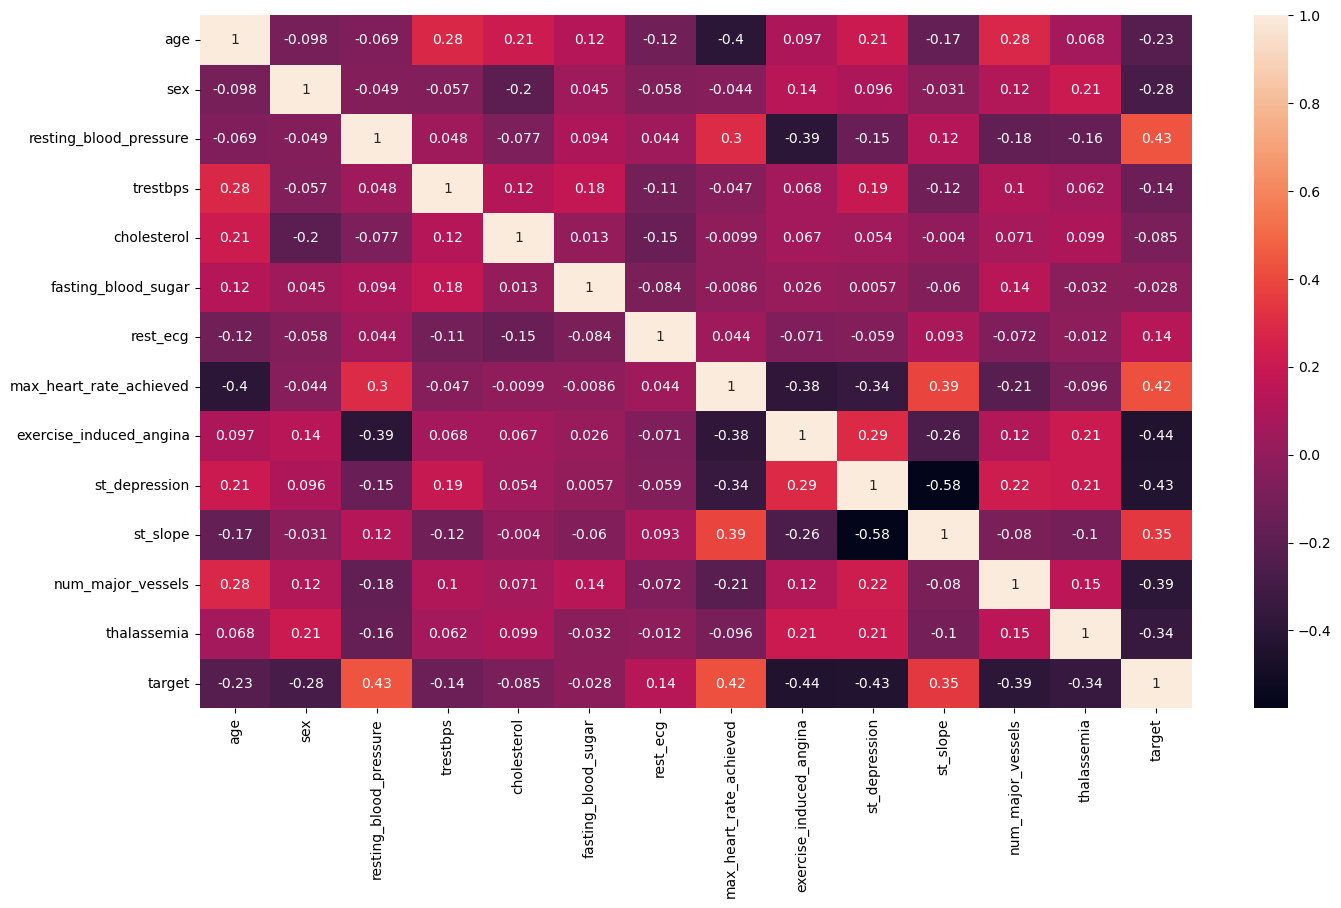

In [17]:
plt.figure(figsize=(16,9))
sns.heatmap(data.corr(method='pearson'), annot=True)

## 4. Tách cột dữ liệu

In [18]:
features = data.drop('target', axis=1)
labels = data['target']

## 5. Chuyển đổi thành One-hot Encoder

In [19]:
features.select_dtypes(exclude=['int64']).columns

Index(['st_depression'], dtype='object')

In [21]:
features_onehot = pd.get_dummies(features, columns=features.select_dtypes(exclude=['int64']).columns)
features_onehot

,age,sex,resting_blood_pressure,trestbps,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_slope,...,st_depression_3.2,st_depression_3.4,st_depression_3.5,st_depression_3.6,st_depression_3.8,st_depression_4.0,st_depression_4.2,st_depression_4.4,st_depression_5.6,st_depression_6.2
0,63,1,3,145,233,1,0,150,0,0,...,False,False,False,False,False,False,False,False,False,False
1,37,1,2,130,250,0,1,187,0,0,...,False,False,True,False,False,False,False,False,False,False
2,41,0,1,130,204,0,0,172,0,2,...,False,False,False,False,False,False,False,False,False,False
3,56,1,1,120,236,0,1,178,0,2,...,False,False,False,False,False,False,False,False,False,False
4,57,0,0,120,354,0,1,163,1,2,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,1,...,False,False,False,False,False,False,False,False,False,False
299,45,1,3,110,264,0,1,132,0,1,...,False,False,False,False,False,False,False,False,False,False
300,68,1,0,144,193,1,1,141,0,1,...,False,True,False,False,False,False,False,False,False,False
301,57,1,0,130,131,0,1,115,1,1,...,False,False,False,False,False,False,False,False,False,False


## 6. Tách thành tập train và test

In [22]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

## 7. Xây dựng ID3 

In [23]:
clf = tree.DecisionTreeClassifier(criterion="entropy", random_state=0)

clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [24]:
tree_pred = clf.predict(X_test)

tree_score = metrics.accuracy_score(y_test, tree_pred)
print("Accuracy: ", tree_score)
print("Report: ", metrics.classification_report(y_test, tree_pred))

Accuracy:  0.7252747252747253
Report:                precision    recall  f1-score   support

           0       0.67      0.76      0.71        41
           1       0.78      0.70      0.74        50

    accuracy                           0.73        91
   macro avg       0.73      0.73      0.72        91
weighted avg       0.73      0.73      0.73        91



Text(0.5, 1.0, 'Decision Tree Accuracy Score: 0.7252747252747253')

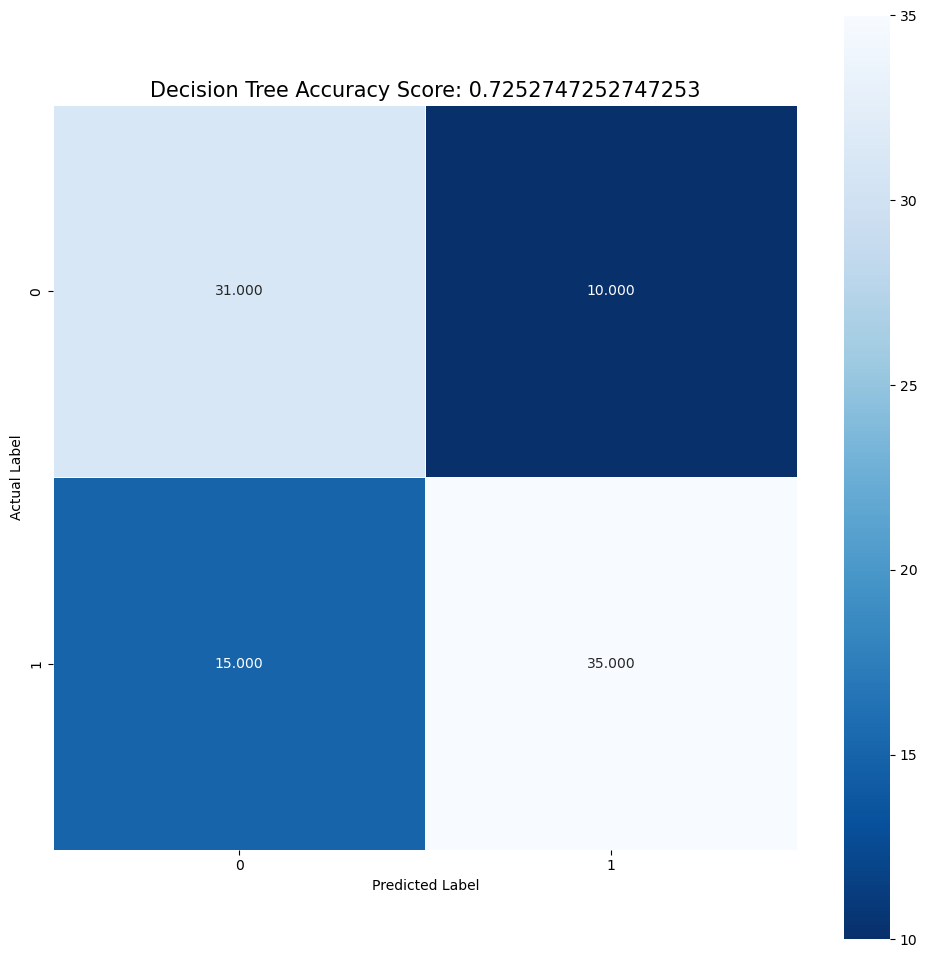

In [25]:
tree_cm = metrics.confusion_matrix(y_test, tree_pred)
plt.figure(figsize=(12,12))
sns.heatmap(tree_cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = "Blues_r");
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
title = 'Decision Tree Accuracy Score: {0}'.format(tree_score)
plt.title(title, size = 15)

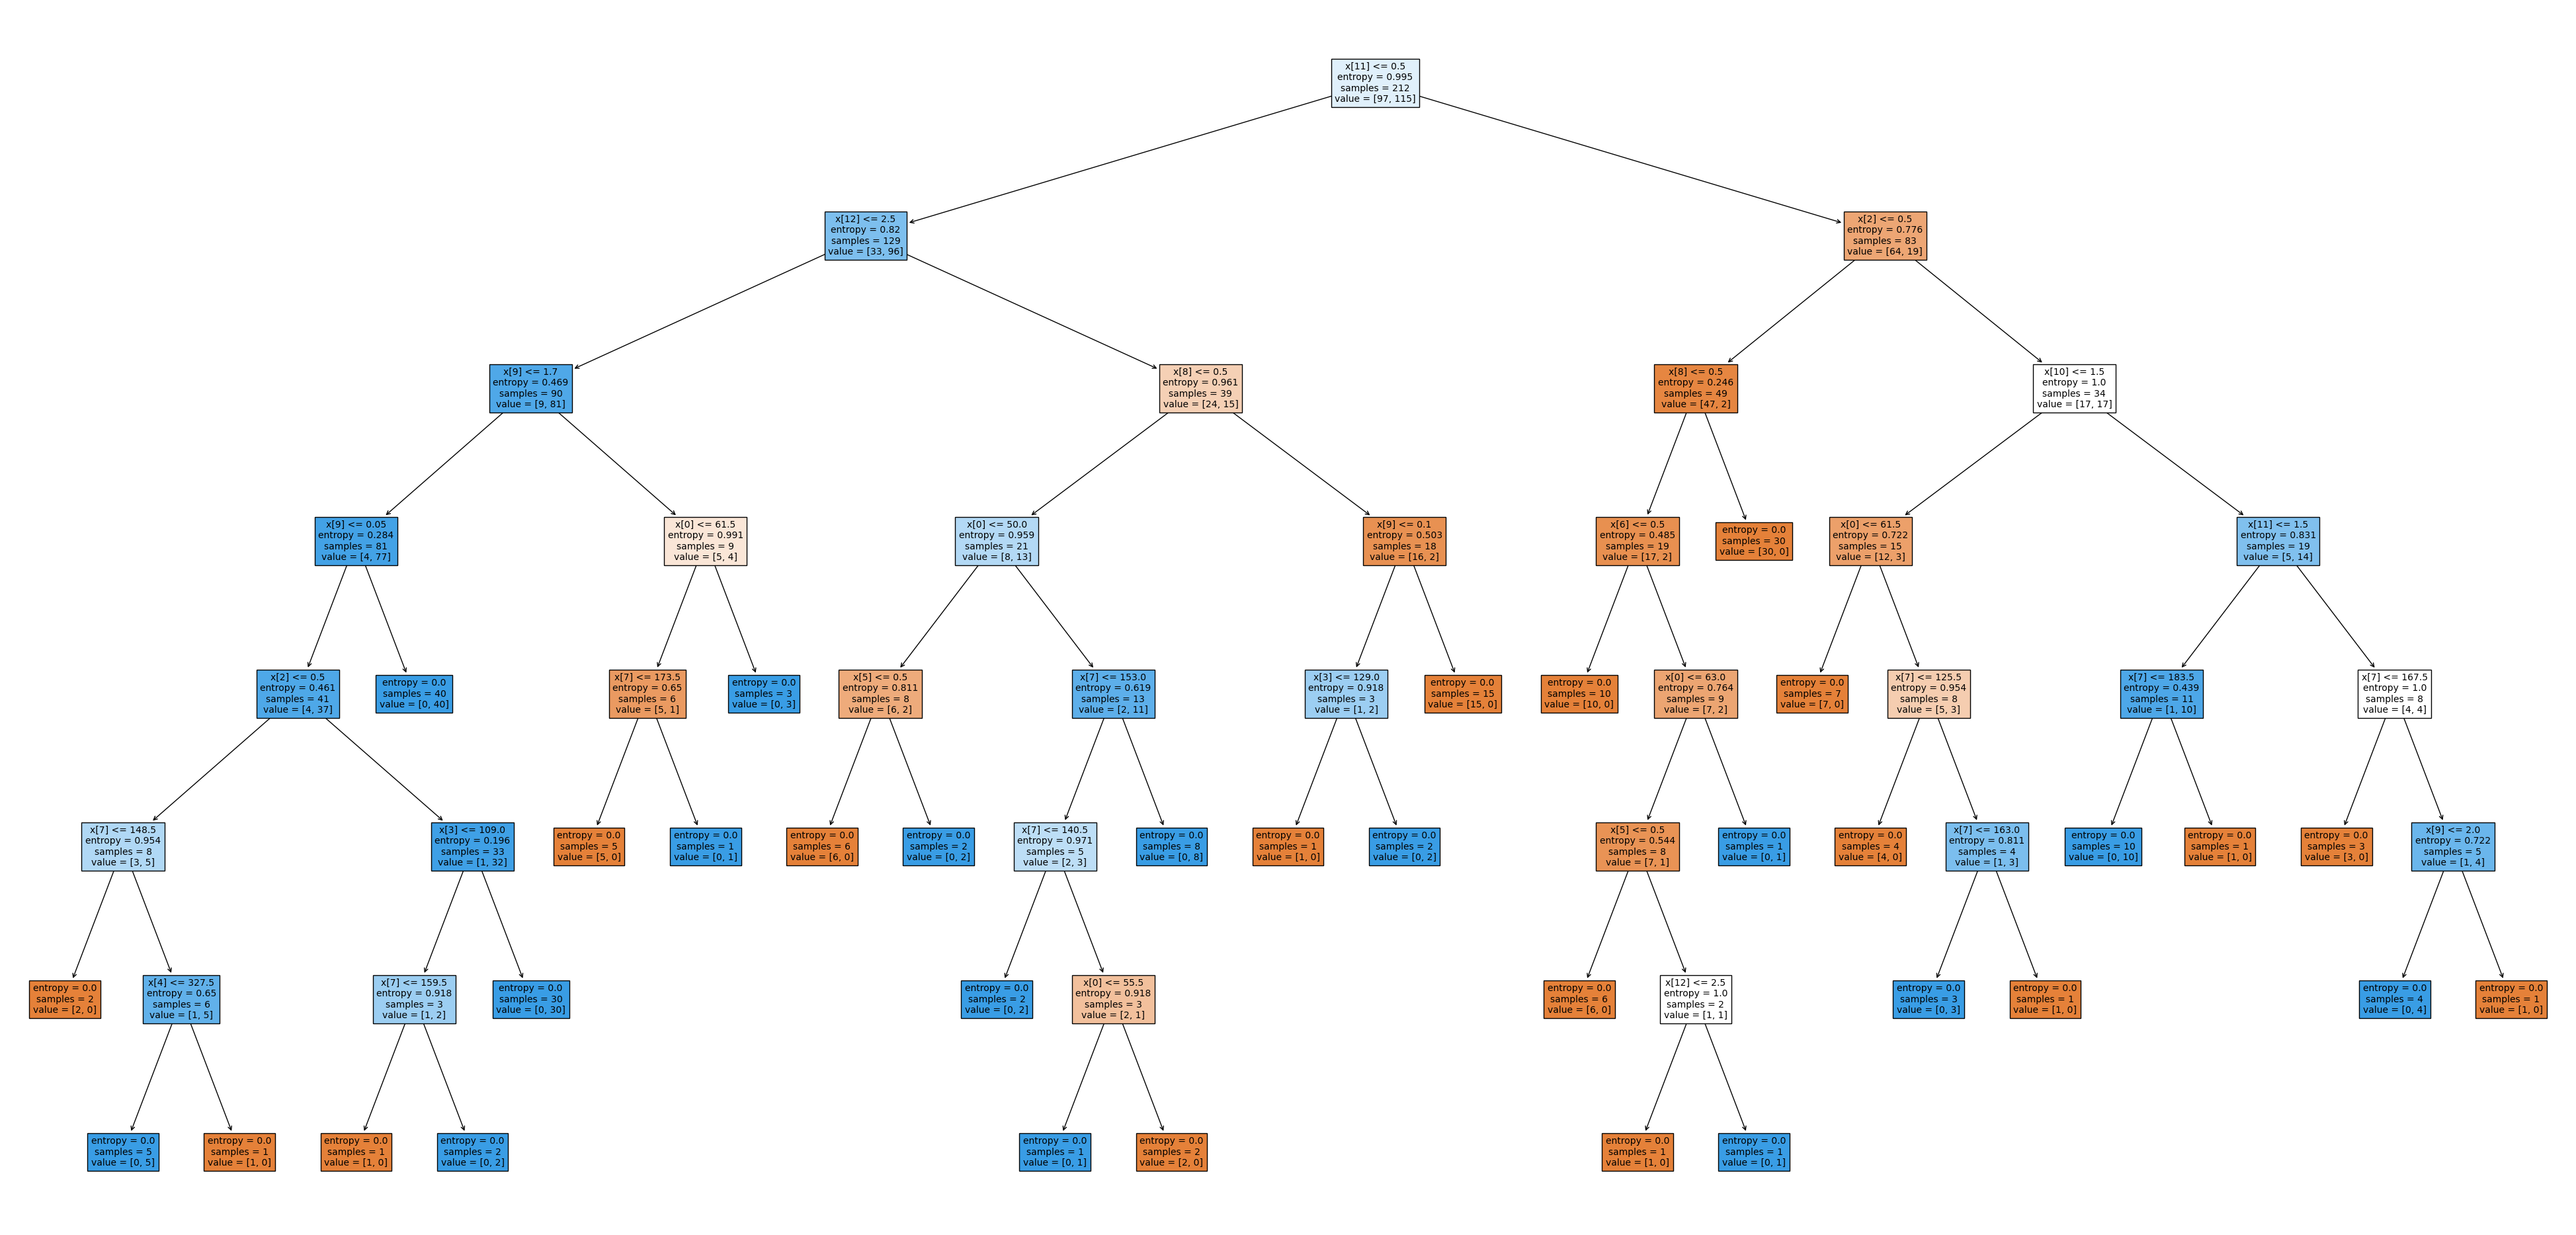

In [26]:
fig, ax = plt.subplots(figsize=(50, 24))
tree.plot_tree(clf, filled=True, fontsize=10)
plt.savefig('Decision_tree_Cau5', dpi=100)
plt.show()

## 8. Thực hiện tương tự dùng Gini index

Accuracy:  0.7252747252747253
Report:                precision    recall  f1-score   support

           0       0.67      0.76      0.71        41
           1       0.78      0.70      0.74        50

    accuracy                           0.73        91
   macro avg       0.73      0.73      0.72        91
weighted avg       0.73      0.73      0.73        91



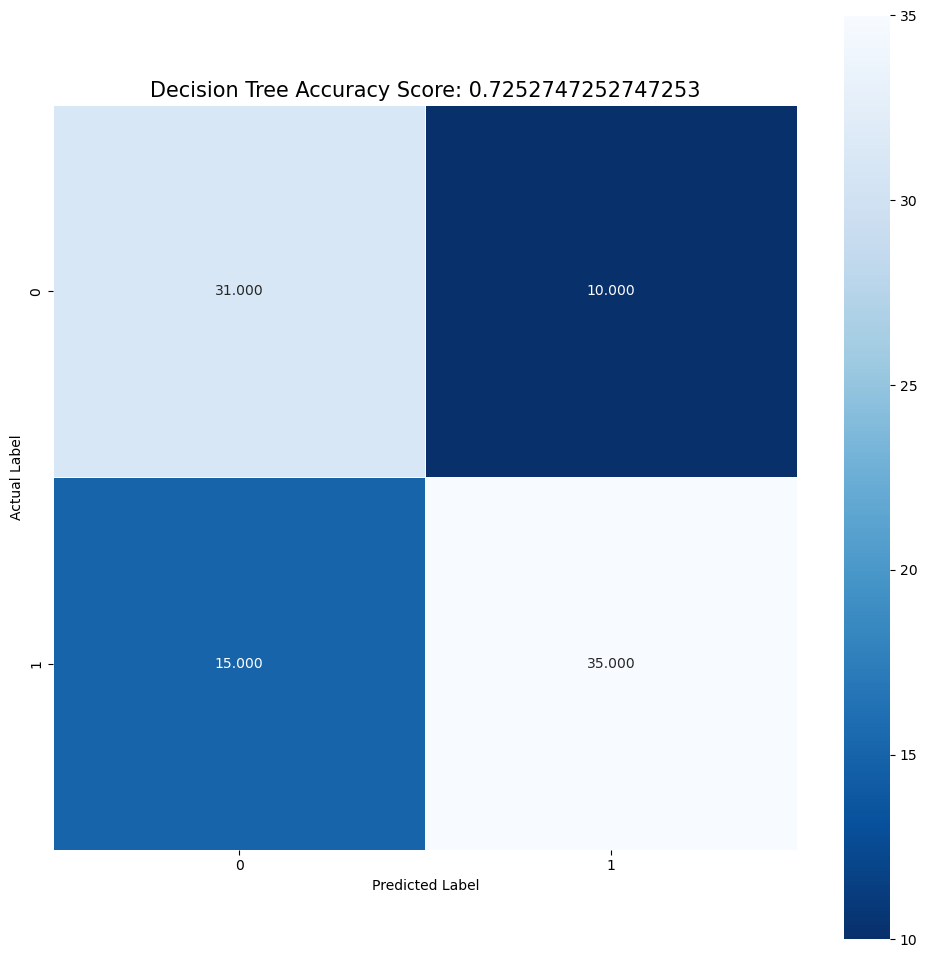

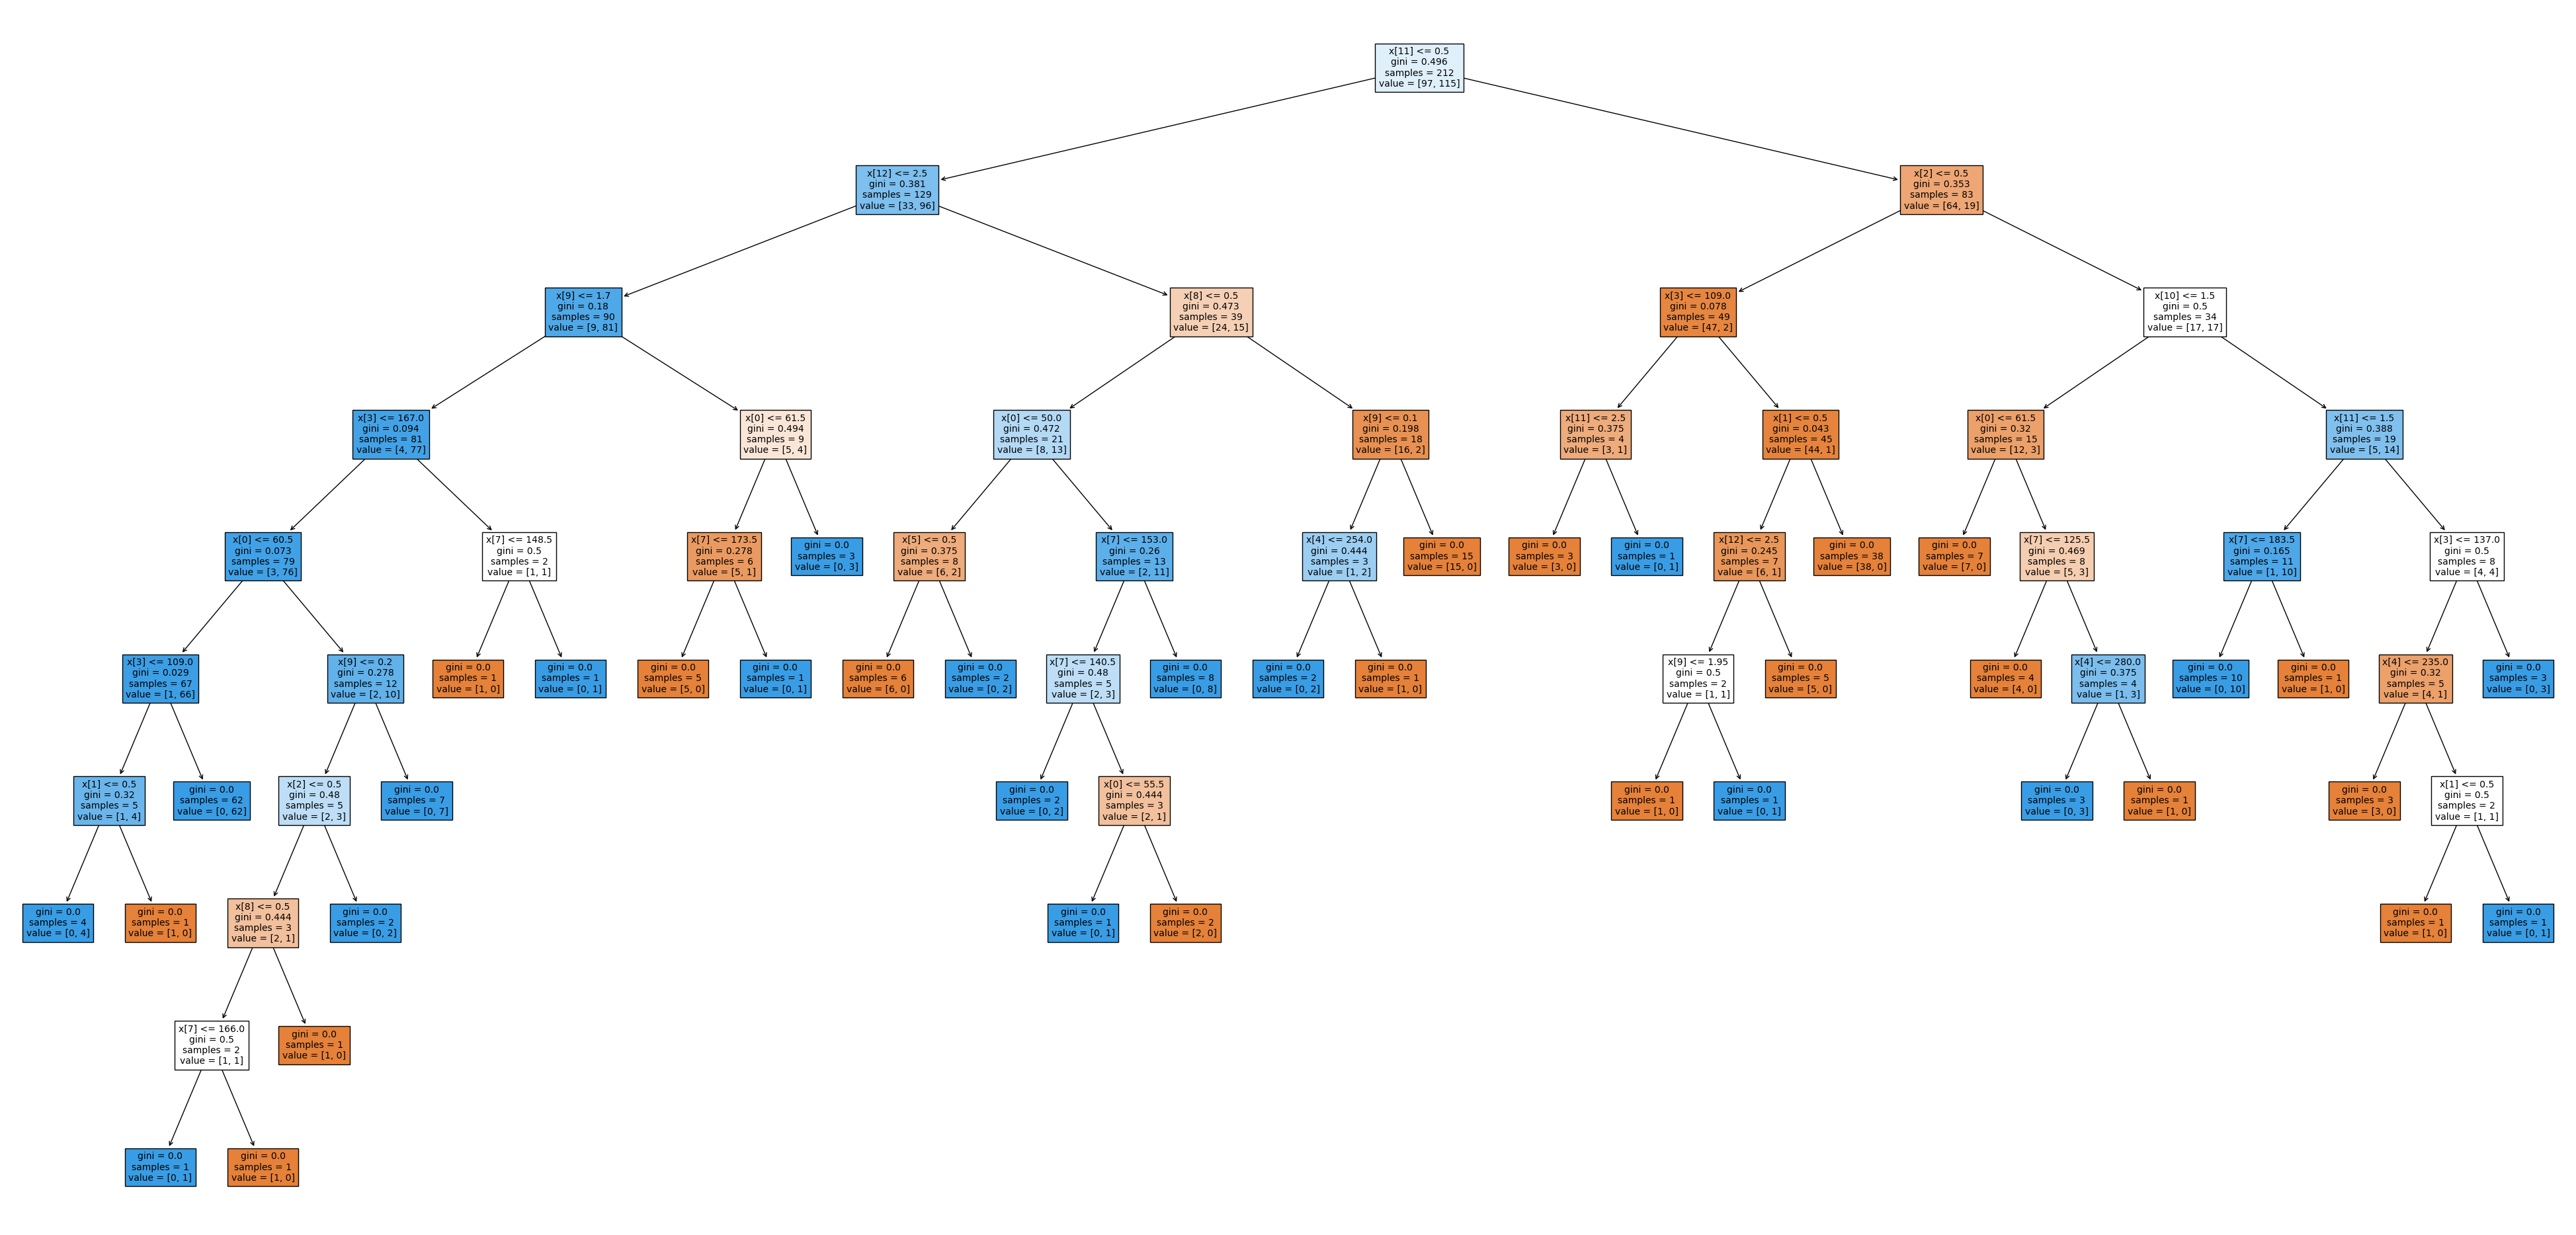

In [27]:
clf_gini = tree.DecisionTreeClassifier(criterion="gini", random_state=0)
clf_gini.fit(X_train, y_train)

tree_pred_gini = clf_gini.predict(X_test)
tree_score_gini = metrics.accuracy_score(y_test, tree_pred_gini)
print("Accuracy: ", tree_score_gini)
print("Report: ", metrics.classification_report(y_test, tree_pred_gini))

tree_cm_gini = metrics.confusion_matrix(y_test, tree_pred_gini)
plt.figure(figsize=(12,12))
sns.heatmap(tree_cm_gini, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = "Blues_r");
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
title = 'Decision Tree Accuracy Score: {0}'.format(tree_score_gini)
plt.title(title, size = 15)

fig, ax = plt.subplots(figsize=(50, 24))
tree.plot_tree(clf_gini, filled=True, fontsize=10)
plt.savefig('Decision_tree_gini_Cau5', dpi=100)
plt.show()

## 9. Xây dựng mô hình sử dụng Naive Bayes

Accuracy:  0.8351648351648352
Report:                precision    recall  f1-score   support

           0       0.78      0.88      0.83        41
           1       0.89      0.80      0.84        50

    accuracy                           0.84        91
   macro avg       0.84      0.84      0.83        91
weighted avg       0.84      0.84      0.84        91



Text(0.5, 1.0, 'Naive Bayes Accuracy Score: 0.8351648351648352')

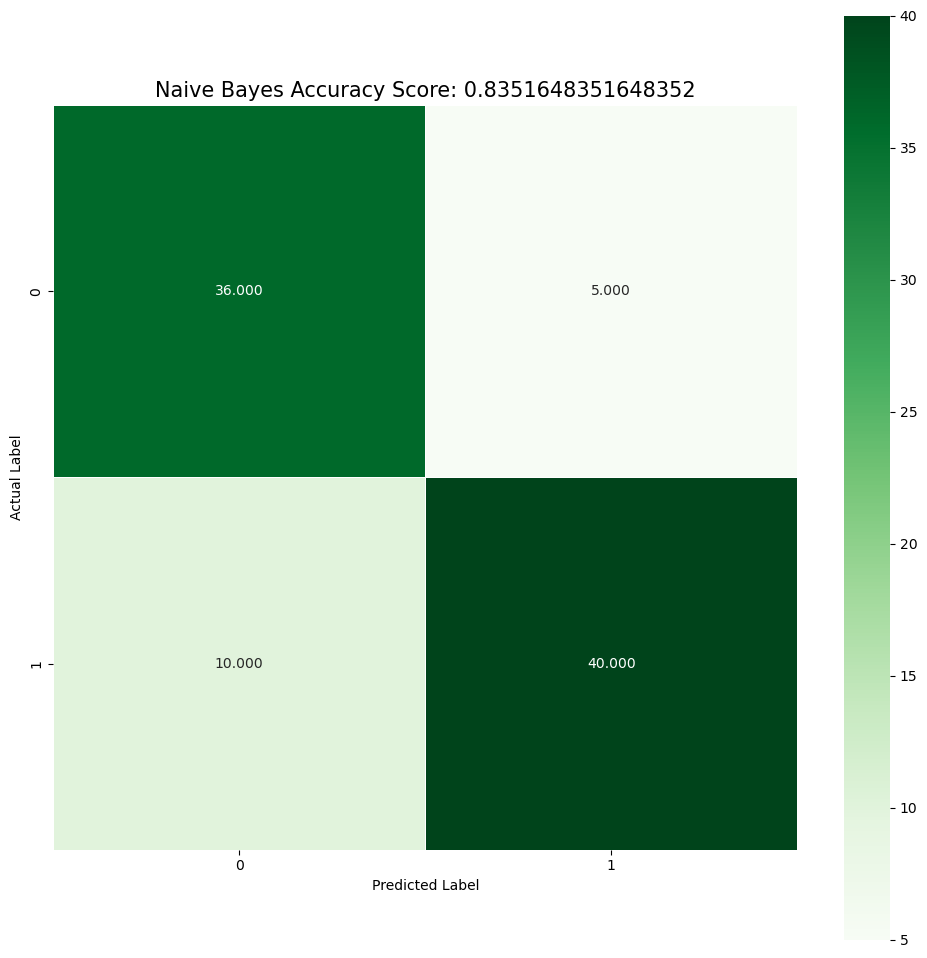

In [28]:
gnb = GaussianNB()
bayes_pred = gnb.fit(X_train, y_train).predict(X_test)

bayes_score = metrics.accuracy_score(y_test, bayes_pred)
print("Accuracy: ", bayes_score)
print("Report: ", metrics.classification_report(y_test, bayes_pred))

bayes_cm = metrics.confusion_matrix(y_test, bayes_pred)
plt.figure(figsize=(12,12))
sns.heatmap(bayes_cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Greens')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Naive Bayes Accuracy Score: {0}'.format(bayes_score),size = 15)

## 10. Nhận xét

- *Độ chính xác*: Naive Bayes có độ chính xác cao nhất (0.835), theo sau lần lượt là ID3 và CART và Naive Bayes (0.725)